# Gradient Descent Exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## sigmoid function

This is used for logistic regression. Defined as: 
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

It's derivative is defined as: 
$$
\frac{d}{d\sigma} = \sigma(x)(1-\sigma(x))
$$

In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

0.5


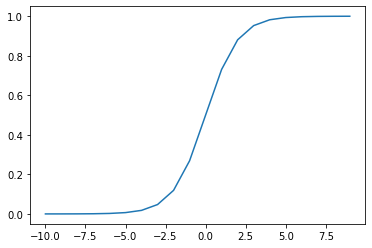

In [3]:
x = np.arange(-10, 10)
plt.plot(x, sigmoid(x));
print(sigmoid(0))

## Data definition

In [4]:
df = pd.read_csv("./titanic/train.csv")

# preprocess some columns
df.fillna(0, inplace=True)
df["Sex"] = df["Sex"] == "male"
df.loc[df["Embarked"] == "S", "Embarked"] = 1
df.loc[df["Embarked"] == "C", "Embarked"] = 2
df.loc[df["Embarked"] == "Q", "Embarked"] = 3
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",True,27.0,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",False,19.0,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",False,0.0,1,2,W./C. 6607,23.4500,0,1
889,890,1,1,"Behr, Mr. Karl Howell",True,26.0,0,0,111369,30.0000,C148,2


## Extract Features and Target

In [5]:
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].to_numpy()

# normalize to -1~1 range
s = MinMaxScaler((-1, 1))
X = s.fit_transform(X)

X.shape

(891, 7)

In [6]:
y = df["Survived"].to_numpy()
y = np.expand_dims(y, axis=1)
y.shape

(891, 1)

## Single Layer Neural Network

In [7]:
class model:
    def __init__(self, shape, lr=1):
        self.W = np.random.rand(*shape)
        self.lr = lr
    
    def forward(self, X):
        z = X @ self.W
        y_hat = sigmoid(z)
        return y_hat
    
    def backward(self, X, y, y_hat):
        dw = X.T @ ((y - y_hat) * y_hat * (1 - y_hat))
        dw /= X.shape[0]
        self.W += self.lr * dw


## Loss term
$$
L_{\theta} = \frac{(y - \hat{y})^2}{2N} \\
\hat{y} = \sigma(w^T x)
$$

In [8]:
def mse_loss(y, y_hat):
    return np.mean(np.square(y - y_hat)) / 2

## Training Loop

Loss at epoch 0: 0.14504521354455918
accuracy:  0.611672278338945

Loss at epoch 10: 0.11940555229470216
accuracy:  0.6307519640852974

Loss at epoch 20: 0.09540734621016884
accuracy:  0.6857463524130191

Loss at epoch 30: 0.08396166085894227
accuracy:  0.7901234567901234

Loss at epoch 40: 0.07912257968769837
accuracy:  0.7901234567901234

Loss at epoch 50: 0.07672168048884216
accuracy:  0.7934904601571269

Loss at epoch 60: 0.07535797667154755
accuracy:  0.7934904601571269

Loss at epoch 70: 0.07451053129497265
accuracy:  0.7968574635241302

Loss at epoch 80: 0.07394897142028027
accuracy:  0.8002244668911336

Loss at epoch 90: 0.07355752737203354
accuracy:  0.797979797979798



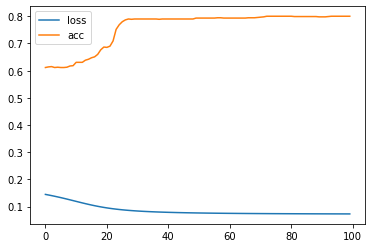

In [9]:
m = model((X.shape[1], 1))
loss = []
acc = []
epochs = 100
for i in range(epochs):
    y_hat = m.forward(X)
    pred = y_hat >= 0.5

    loss.append(mse_loss(y, y_hat))
    acc.append(np.count_nonzero(pred == y) / y.shape[0])

    if i % 10 == 0:
        print(f"Loss at epoch {i}: {loss[-1]}")
        print("accuracy: ", acc[-1])
        print()

    m.backward(X, y, y_hat)

plt.plot(loss, label="loss")
plt.plot(acc, label="acc")
plt.legend();

## Prediction Demo

In [10]:
(m.forward(X[:10]) >= 0.5).astype(np.int16), y[:10]

(array([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1]], dtype=int16),
 array([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1]]))